In [1]:
from torchvision import datasets

In [2]:
data_path = '../data/'
cifar10 = datasets.CIFAR10(data_path,train=True,download=True)
cifar10_val = datasets.CIFAR10(data_path,train=False,download=True)

Files already downloaded and verified
Files already downloaded and verified


In [3]:
cifar10

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ../data/
    Split: Train

In [4]:
# 데이터 셋에는 __getitem__메소드가 구현되어 있음
# __len __ 구현되어 있어서 len()함수 사용
len(cifar10)

50000

In [5]:
img, label = cifar10[99]

In [6]:
type(cifar10).__mro__

(torchvision.datasets.cifar.CIFAR10,
 torchvision.datasets.vision.VisionDataset,
 torch.utils.data.dataset.Dataset,
 typing.Generic,
 object)

In [7]:
class_name = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

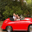

In [8]:
img

In [9]:
label, class_name[label]

(1, 'automobile')

In [10]:
# 이미지를 파이토치 텐서로 변환
from torchvision import transforms
dir(transforms)

['AugMix',
 'AutoAugment',
 'AutoAugmentPolicy',
 'CenterCrop',
 'ColorJitter',
 'Compose',
 'ConvertImageDtype',
 'ElasticTransform',
 'FiveCrop',
 'GaussianBlur',
 'Grayscale',
 'InterpolationMode',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'PILToTensor',
 'Pad',
 'RandAugment',
 'RandomAdjustSharpness',
 'RandomAffine',
 'RandomApply',
 'RandomAutocontrast',
 'RandomChoice',
 'RandomCrop',
 'RandomEqualize',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomInvert',
 'RandomOrder',
 'RandomPerspective',
 'RandomPosterize',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSolarize',
 'RandomVerticalFlip',
 'Resize',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 'TrivialAugmentWide',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_pil_constants',
 '_presets',
 'autoaugment',
 'functional',
 'functional_pil',
 'functional_tensor',
 'transforms']

In [11]:
# transforms.ToTensor  넘파이 배열, PIL이미지를 텐서로 바꾸는역활, C x H x W로 맞춰준다

In [12]:
to_tensor = transforms.ToTensor()
img_t = to_tensor(img)
img_t.shape

torch.Size([3, 32, 32])

In [13]:
tensor_cifar10 = datasets.CIFAR10(data_path,train=True,download=False, transform=transforms.ToTensor())

In [14]:
img_t, label = tensor_cifar10[99]
type(img_t)

torch.Tensor

In [15]:
img_t.shape, img_t.dtype

(torch.Size([3, 32, 32]), torch.float32)

In [16]:
# toTensor()는 이미지를 텐서로 변경하면서 데이터를 scaled 한다.. 0.0 ~ 1.0
img_t.min(), img_t.max()

(tensor(0.), tensor(1.))

In [17]:
# 동일한 이미지 인지 확인한다
import matplotlib.pylab as plt

In [18]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'
# KMP_DUPLICATE_LIB_OK=TRUE

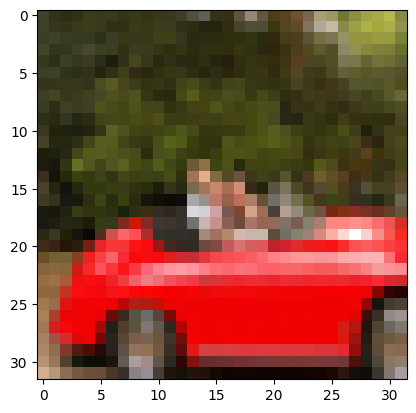

In [26]:
import numpy as np
new_img =  np.array(img_t).transpose(1,2,0)
plt.imshow(new_img)

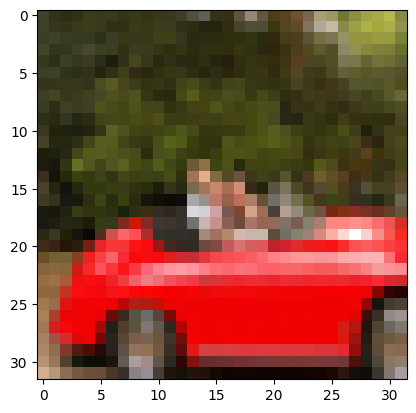

In [28]:
plt.imshow(img_t.permute(1,2,0))

In [29]:
# 데이터 정규화
# 변환작업을  transeforms.Compose로 여러 변환을 엮어서 사용

In [32]:
import torch

In [33]:
imgs = torch.stack( [img_t for img_t, label in tensor_cifar10], dim=3)
imgs.shape

torch.Size([3, 32, 32, 50000])

In [36]:
# 채널별로 평균
imgs.view(3,-1).mean(dim=1)

tensor([0.4914, 0.4822, 0.4465])

In [37]:
# 채널별로 표준편차
imgs.view(3,-1).std(dim=1)

tensor([0.2470, 0.2435, 0.2616])

In [38]:
# 정규화   = (요소 - 평균) / 표준편차

In [39]:
transforms.Normalize((0.4914, 0.4822, 0.4465),(0.2470, 0.2435, 0.2616))

Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.247, 0.2435, 0.2616))

In [70]:
# 이미지 데이터를 토치로 변경, 정규화
transformed_cifar10 = datasets.CIFAR10(data_path,train=True,download=False
                                       , transform=transforms.Compose([
                                           transforms.ToTensor(),
                                           transforms.Normalize((0.4914, 0.4822, 0.4465),(0.2470, 0.2435, 0.2616))
                                       ])                                       
                                      )
transformed_cifar10_val = datasets.CIFAR10(data_path,train=False,download=False
                                       , transform=transforms.Compose([
                                           transforms.ToTensor(),
                                           transforms.Normalize((0.4914, 0.4822, 0.4465),(0.2470, 0.2435, 0.2616))
                                       ])                                       
                                      )

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


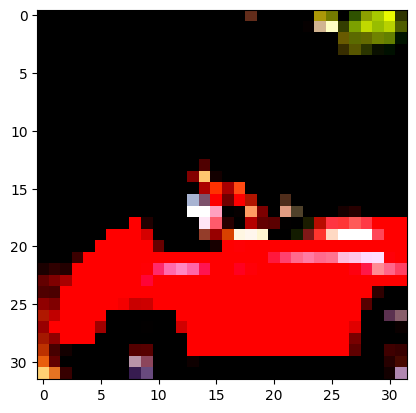

In [42]:
img_t, label =  transformed_cifar10[99]
plt.imshow(img_t.permute(1,2,0))

In [43]:
# 새와 비행기를 구분하기

In [71]:
label_map = {0:0, 2:1}
class_name = ['airplane','bird']
cifar2 = [(img,label_map[label]) for img,label in transformed_cifar10 if label in [0,2]]
cifar2_val = [(img,label_map[label]) for img,label in transformed_cifar10_val if label in [0,2]]

In [72]:
img,label =  cifar2[99]
img

tensor([[[ 0.4556,  0.4556,  0.4873,  ...,  0.0904,  0.1063,  0.2174],
         [ 0.5191,  0.4714,  0.4873,  ..., -0.0366, -0.0366,  0.0904],
         [ 0.6620,  0.5984,  0.5984,  ...,  0.0745,  0.0904,  0.2015],
         ...,
         [-0.4653, -0.5447, -0.5764,  ..., -0.5447, -0.6082, -0.5606],
         [-0.4335, -0.5288, -0.5129,  ..., -0.6082, -0.5447, -0.5129],
         [-0.4653, -0.5288, -0.5129,  ..., -0.6558, -0.6399, -0.4971]],

        [[ 1.2085,  1.1924,  1.2246,  ...,  1.0797,  1.0958,  1.1602],
         [ 1.2246,  1.1602,  1.1763,  ...,  0.9830,  0.9991,  1.0797],
         [ 1.3534,  1.2729,  1.2729,  ...,  1.0152,  1.0475,  1.1119],
         ...,
         [-0.7563, -0.8368, -0.8690,  ..., -0.8368, -0.9013, -0.8529],
         [-0.7080, -0.8207, -0.7885,  ..., -0.9013, -0.8368, -0.8046],
         [-0.7402, -0.8046, -0.7885,  ..., -0.9496, -0.9174, -0.7885]],

        [[ 1.3963,  1.3813,  1.4263,  ...,  1.3963,  1.4113,  1.5012],
         [ 1.3813,  1.3213,  1.3363,  ...,  1

In [48]:
label

0

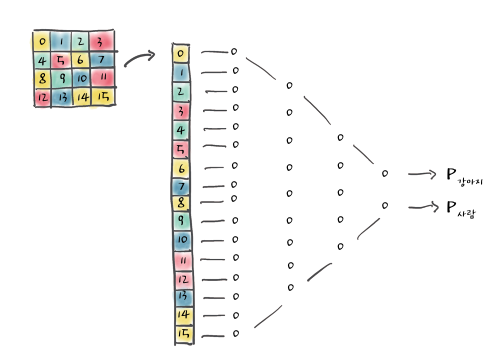

In [73]:
import torch.nn as nn
n_out = 2
model = nn.Sequential(
    nn.Linear(3*32*32,512),
    nn.Sigmoid(),
    nn.Linear(512,n_out)
)

In [74]:
def softmax(x):
    return torch.exp(x) / torch.exp(x).sum()

In [75]:
x = torch.tensor([1.0,2.0,3.0])
sx = softmax(x)
sx

tensor([0.0900, 0.2447, 0.6652])

In [76]:
sx.sum()

tensor(1.)

In [77]:
softmax = nn.Softmax(dim=1)
x = torch.tensor([
    [1.0,2.0,3.0],
    [1.0,2.0,3.0]
])
x.shape

torch.Size([2, 3])

In [78]:
softmax(x), softmax(x).sum()

(tensor([[0.0900, 0.2447, 0.6652],
         [0.0900, 0.2447, 0.6652]]),
 tensor(2.0000))

In [79]:
model = nn.Sequential(
    nn.Linear(3*32*32,512),
    nn.Sigmoid(),
    nn.Linear(512,n_out),
    nn.Softmax(dim=1)
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


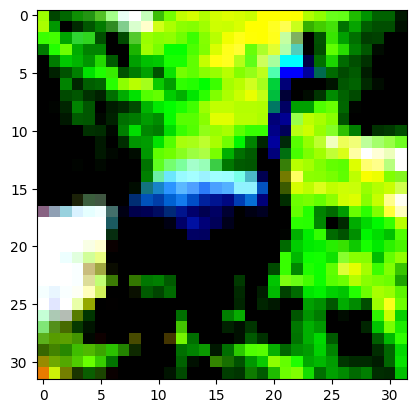

In [81]:
img,label = cifar2[0]
plt.imshow(img.permute(1,2,0))

In [82]:
img.shape

torch.Size([3, 32, 32])

In [85]:
img.view(-1).unsqueeze(0).shape

torch.Size([1, 3072])

In [86]:
img_batch = img.view(-1).unsqueeze(0)

In [87]:
out = model(img_batch)
out

tensor([[0.5766, 0.4234]], grad_fn=<SoftmaxBackward0>)

In [92]:
_,index = torch.max(out,dim=1)
index.item()

0

In [93]:
model = nn.Sequential(
    nn.Linear(3*32*32,512),
    nn.Sigmoid(),
    nn.Linear(512,n_out),
    nn.LogSoftmax(dim=1)
)

In [94]:
# 분류기 훈련

In [97]:
import torch
import torch.nn as nn
model = nn.Sequential(
    nn.Linear(3*32*32,512),
    nn.LeakyReLU(),
    nn.Linear(512,2),
    nn.LogSoftmax(dim=1)
)
learning_rate = 1e-2
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
loss_fn = nn.NLLLoss()
n_epochs = 100
for epoch in range(n_epochs):
    for img,label in cifar2:  # 전체데이터를 한꺼번에 학습하는 구조라서 시간이 꽤 걸림.. (실행하지 않음)
        out = model(img.view(-1).unsqueeze(0))
        loss = loss_fn(out, torch.tensor([label]))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f"epoch:{epoch} loss : {float(loss)}")


In [99]:
# 내부루프안에서 한번에 하나의 샘플을 평가하고 단일 샘플에 대해 역전파

In [100]:
import torch
import torch.nn as nn
train_loader = torch.utils.data.DataLoader(cifar2,batch_size=64,shuffle=True)

In [102]:
len(train_loader), len(cifar2)

(157, 10000)

In [108]:
for idx, (img,label) in enumerate(train_loader):    
    if idx == 156:
        print(img.shape)
        print(len(label))
    

torch.Size([16, 3, 32, 32])
16


In [115]:
import torch
import torch.nn as nn
train_loader = torch.utils.data.DataLoader(cifar2,batch_size=64,shuffle=True)
model = nn.Sequential(
    nn.Linear(3*32*32, 1024),
    nn.LeakyReLU(),
    nn.Linear(1024, 512),
    nn.LeakyReLU(),
    nn.Linear(512, 128),
    nn.LeakyReLU(),
    nn.Linear(128, 2),
    nn.LogSoftmax(dim=1)
)
learning_rate = 1e-2
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()
n_epochs = 100
for epoch in range(n_epochs):
    for img,labels in train_loader:
        batch_size = img.shape[0]
        outputs = model(img.view(batch_size, -1))
        loss = loss_fn(outputs,labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f"epoch:{epoch} loss:{float(loss)}")

epoch:0 loss:0.5219222903251648
epoch:1 loss:0.5372404456138611
epoch:2 loss:0.3474525213241577
epoch:3 loss:0.26620447635650635
epoch:4 loss:0.4019652009010315
epoch:5 loss:0.2848101556301117
epoch:6 loss:0.3675321042537689
epoch:7 loss:0.3850443959236145
epoch:8 loss:0.2753135561943054
epoch:9 loss:0.2009614109992981
epoch:10 loss:0.384694904088974
epoch:11 loss:0.3196393847465515
epoch:12 loss:0.3583287000656128
epoch:13 loss:0.16498219966888428
epoch:14 loss:0.12124906480312347
epoch:15 loss:0.15864098072052002
epoch:16 loss:0.11130715906620026
epoch:17 loss:0.23125480115413666
epoch:18 loss:0.08606544882059097
epoch:19 loss:0.24269138276576996
epoch:20 loss:0.16885271668434143
epoch:21 loss:0.0897260308265686
epoch:22 loss:0.061301082372665405
epoch:23 loss:0.3552441895008087
epoch:24 loss:0.10106529295444489
epoch:25 loss:0.02278640680015087
epoch:26 loss:0.12239572405815125
epoch:27 loss:0.04027445986866951
epoch:28 loss:0.10913719236850739
epoch:29 loss:0.02188413217663765
epoc

In [114]:
val_loader = torch.utils.data.DataLoader(cifar2_val,batch_size=64, shuffle=False)
correct = 0
total = 0
with torch.no_grad():
    for img,label in val_loader:
        batch_size = img.shape[0]
        outputs = model(img.view(batch_size,-1))
        _,predicted = torch.max(outputs, dim=1)
        total += label.shape[0]
        correct += (predicted == label).sum()
    print(f'accurach : {correct / total}')

accurach : 0.8529999852180481


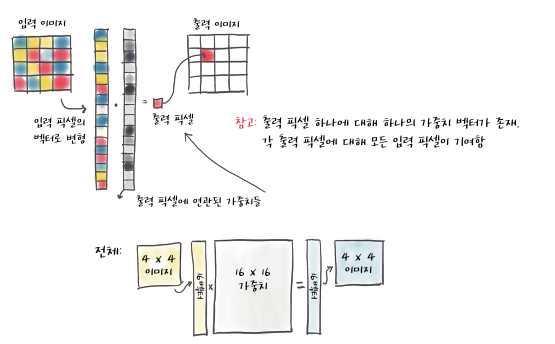

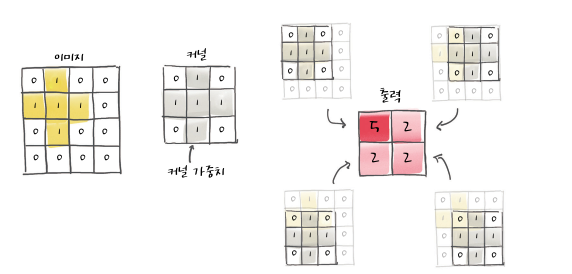